In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading an example dataset provided by the seaborn package.
tips = sns.load_dataset("tips")
print(tips.head(n=4))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2


In [3]:
# Creating variables for each of the four conditions to graph using the basic
# matplotlib functionality.
menlunchtip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Lunch'),'tip']
womenlunchtip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Lunch'),'tip']
mendinnertip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Dinner'),'tip']
womendinnertip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Dinner'),'tip']

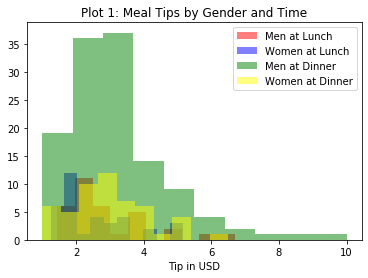

In [4]:
# Making overlapping histograms.
plt.hist(menlunchtip, color='red',  alpha=.5,label='Men at Lunch')  # alpha just controls the opacity
plt.hist(womenlunchtip, color='blue', alpha=.5,label='Women at Lunch')
plt.hist(mendinnertip, color='green', alpha=.5,label='Men at Dinner')  
plt.hist(womendinnertip, color='yellow', alpha=.5,label='Women at Dinner')
plt.xlabel('Tip in USD')
plt.legend(loc='upper right')
plt.title('Plot 1: Meal Tips by Gender and Time')
plt.show()

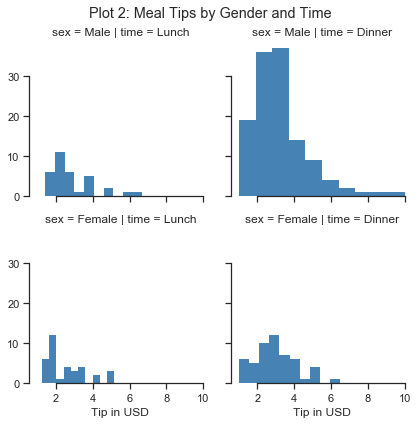

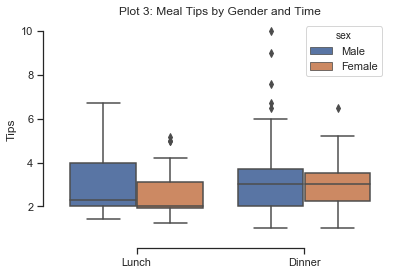

In [5]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(tips, row="sex", col="time")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "tip", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Tip in USD')
plt.suptitle('Plot 2: Meal Tips by Gender and Time')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

# Comparing groups using boxplots.
ax = sns.boxplot(x='time',y='tip',hue='sex',data=tips)  
plt.title('Plot 3: Meal Tips by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

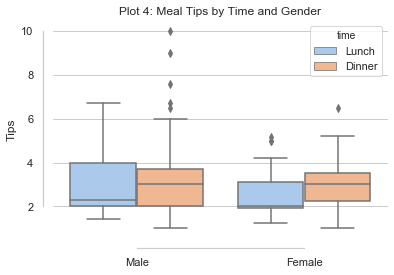

In [6]:
#Comparing groups again, but with a different emphasis.

# Setting the overall aesthetic.
sns.set(style="whitegrid")

ax = sns.boxplot(x='sex',y='tip',hue='time',data=tips,palette='pastel')  

plt.title('Plot 4: Meal Tips by Time and Gender')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

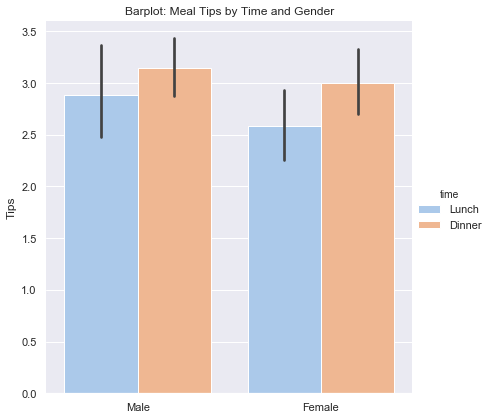

In [7]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

# Use catplot (previous versions of seaborn use factorplot)
g = sns.catplot(x="sex", y="tip", hue="time", data=tips,
                   height=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Barplot: Meal Tips by Time and Gender')
plt.show()

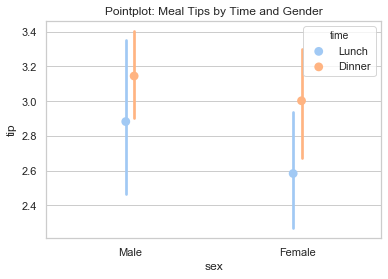

In [8]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.pointplot(x="sex", y="tip", hue="time", data=tips,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True,join=False)
plt.title('Pointplot: Meal Tips by Time and Gender')
plt.show()

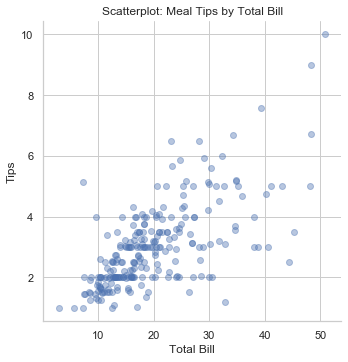

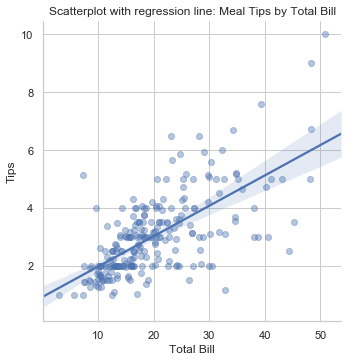

In [9]:
g = sns.lmplot(y='tip', # Variable 1.
               x='total_bill', # Variable 2.
               data=tips, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot: Meal Tips by Total Bill')
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               data=tips, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot with regression line: Meal Tips by Total Bill')
plt.show()

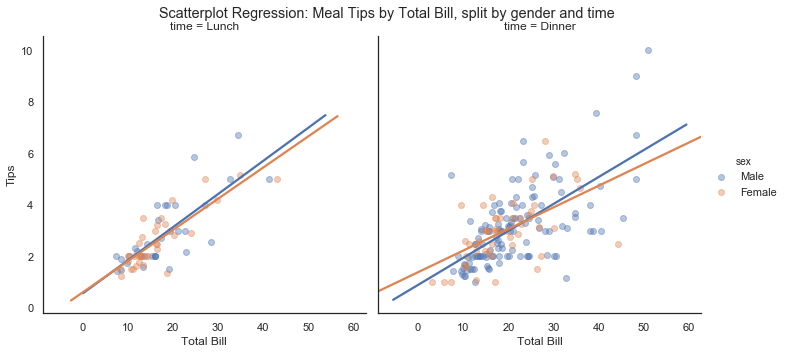

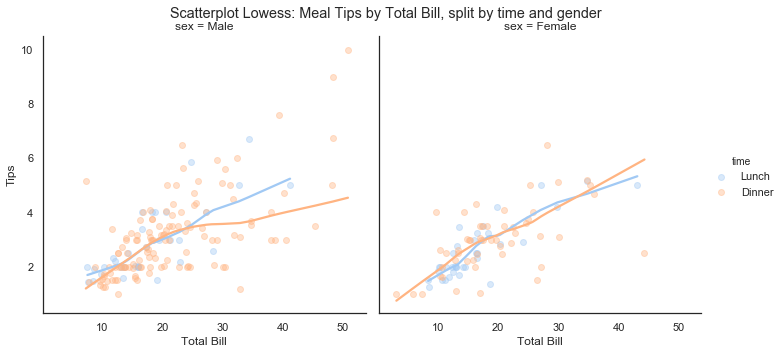

In [11]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='sex',
               data=tips, # Data.
               col='time',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='time',
               data=tips, # Data.
               col='sex',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Lowess: Meal Tips by Total Bill, split by time and gender')
plt.subplots_adjust(top=0.9)
plt.show()

## Assignment

The best way to learn plotting is to make a lot of plots. To complete the following you may need to explore [the seaborn documentation](http://seaborn.pydata.org/index.html).

1. Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
    + Choose one variable and plot that variable four different ways.
    + Choose two continuous variables, and plot them three different ways.
    + Choose one continuous variable and one categorical variable, and plot them six different ways.
    + Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.
2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
    + Probability distributions
    + Bivariate relationships
    + Whether the distributions or the relationships vary across groups
    + Accompany your plot with a written description of what you see.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df1 = df[df.Global_Sales >= 1]
df1 = df1.drop(df1.index[[0,1]])
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
...,...,...,...,...,...,...,...,...,...,...,...
2076,2078,Wheel of Fortune,Wii,2010.0,Misc,THQ,0.89,0.04,0.00,0.06,1.00
2077,2079,Disney Infinity,PS3,2013.0,Action,Disney Interactive Studios,0.48,0.35,0.00,0.16,1.00
2078,2080,Dark Souls,X360,2011.0,Role-Playing,Namco Bandai Games,0.64,0.28,0.00,0.08,1.00
2079,2081,Puzzler Collection,DS,2008.0,Puzzle,Ubisoft,0.17,0.78,0.00,0.04,1.00


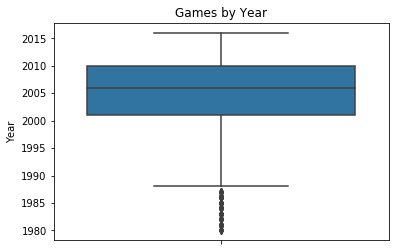

In [19]:
sns.boxplot(y='Year',data=df1)
plt.title('Games by Year')
plt.show()

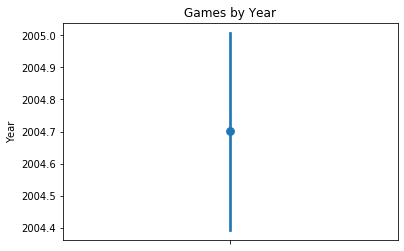

In [20]:
sns.pointplot(y='Year', data=df1, height=6,ci=95)
plt.title('Games by Year')
plt.show()

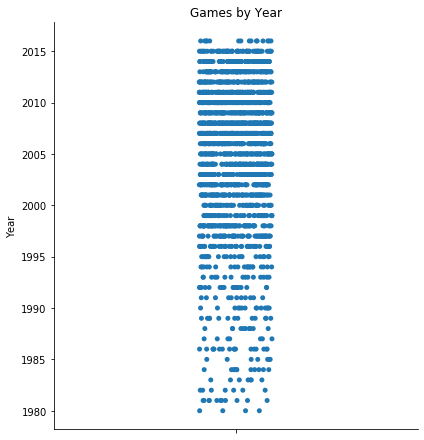

In [21]:
sns.catplot(y='Year', data=df1, height=6,ci=95)
plt.title('Games by Year')
plt.show()

In [30]:
sns.hist(x='Year',data=df1)
plt.title('Games by Year')
plt.show()

AttributeError: module 'seaborn' has no attribute 'hist'